# Preprocessing For Correlation

In [4]:
import pandas as pd # import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
%pwd

'/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector'

In [6]:
%cd CSV_file_from_2007_to_2017

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [7]:
%ls

EasternRegion_CO_airpointers.csv    WesternRegion_CO_airpointers.csv
EasternRegion_NO2_airpointers.csv   WesternRegion_NO2_airpointers.csv
EasternRegion_O3_airpointers.csv    WesternRegion_O3_airpointers.csv
EasternRegion_PM10_airpointers.csv  WesternRegion_PM10_airpointers.csv
EasternRegion_PM25_airpointers.csv  WesternRegion_PM25_airpointers.csv
EasternRegion_SO2_airpointers.csv   WesternRegion_SO2_airpointers.csv
SkopjeRegion_CO_airpointers.csv     data.xlsx
SkopjeRegion_NO2_airpointers.csv    newfile.xlsx
SkopjeRegion_O3_airpointers.csv     outfile
SkopjeRegion_PM10_airpointers.csv   outfile1
SkopjeRegion_PM25_airpointers.csv   processed_with_columns_droped.csv
SkopjeRegion_SO2_airpointers.csv    raw_processed.csv


In [8]:
pollution_PM = pd.read_csv("SkopjeRegion_PM10_airpointers.csv") #load data set
pollution_PM=pollution_PM.rename(columns = {'DATE_TIME;LAT;LON;PM10;NAME':'pm10'})#rename
df_ = pd.DataFrame(pollution_PM.pm10.str.split(';',4).tolist(),columns = ['date','Lat','Lon','PM10','NAME'])

In [9]:
pollution_PM = pd.read_csv("SkopjeRegion_PM10_airpointers.csv") #load data set
pollution_PM=pollution_PM.rename(columns = {'DATE_TIME;LAT;LON;PM10;NAME':'pm10'})#rename


## Plot PM10

In [10]:
#  Missing Values 
df_.isnull().sum() # No null value reported because PM10 is of  object type

date    0
Lat     0
Lon     0
PM10    0
NAME    0
dtype: int64

In [11]:
df_['PM10']= pd.to_numeric(df_['PM10']) # Convert PM_10 column to Numeric Values

In [12]:
df_.isnull().sum() # Total number of Null values

date         0
Lat          0
Lon          0
PM10    255713
NAME         0
dtype: int64

In [13]:
print("Total Number of PM10 with zero values: ",df_['PM10'].loc[df_['PM10'] == 0.0].size) # Total Number of Pm10 with zero values

Total Number of PM10 with zero values:  27


In [14]:
df_['PM10'].replace('NaN', np.NaN)[1:3] #replace NAn with zero np.nan

1      NaN
2    61.67
Name: PM10, dtype: float64

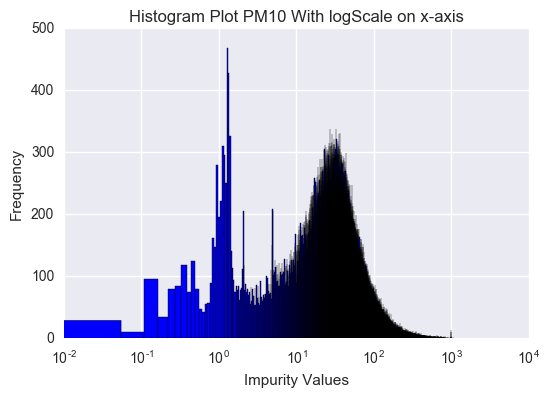

In [15]:
fig, ax = plt.subplots()
df_.PM10.hist(ax=ax,bins=20000,color='blue',bottom=0.1)
#ax.set_yscale('log')
ax.set_xscale('log')
plt.title("Histogram Plot PM10 With logScale on x-axis")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")


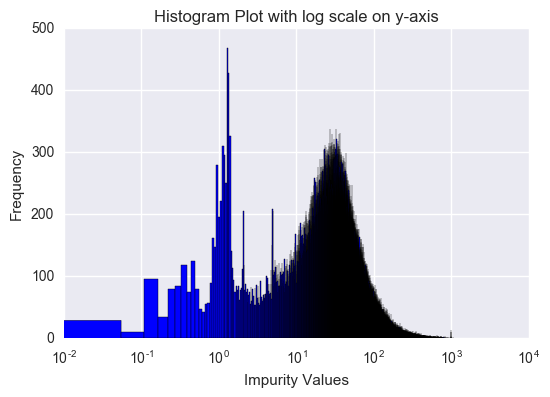

In [15]:
fig, ax = plt.subplots()
df_.PM10.hist(ax=ax,bins=20000,color='blue',bottom=0.1)
ax.set_xscale('log')
plt.title("Histogram Plot with log scale on y-axis")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")


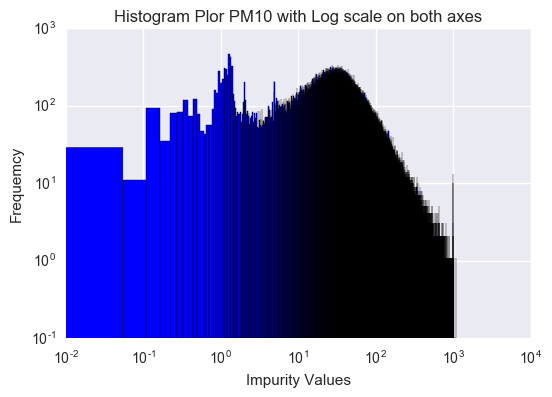

In [16]:
fig, ax = plt.subplots()
df_.PM10.hist(ax=ax,bins=20000,color='blue',bottom=0.1)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title("Histogram Plor PM10 with Log scale on both axes")
plt.ylabel("Frequemcy")
plt.xlabel("Impurity Values")


## Sort data According to date 

In [16]:
df_.date = pd.to_datetime(df_.date) # convert date to date time datatype

In [17]:
df_Sorted = df_.sort_values(by='date',ascending=True)

In [18]:
df_Sorted.head()

,date,Lat,Lon,PM10,NAME
9414,2007-01-02,41.987500,21.652500,NaN,Miladinovci
9408,2007-01-02,41.992500,21.423611,NaN,Centar
9411,2007-01-02,41.977821,21.464474,NaN,Lisice
9412,2007-01-02,41.999200,21.440800,204.92,Rektorat
9413,2007-01-02,42.015800,21.650600,NaN,Mrsevci


In [ ]:
df_Sorted.dtypes

date    datetime64[ns]
Lat             object
Lon             object
PM10           float64
NAME            object
dtype: object

<b> Drop Columns Lat, Lon and Name </b>

In [13]:
df_Sorted.drop(['Lat','Lon','NAME'], axis = 1, inplace = True, errors = 'ignore')

In [14]:
df_Sorted[1:7]


,date,PM10
9408,2007-01-02,NaN
9411,2007-01-02,NaN
9412,2007-01-02,204.92
9413,2007-01-02,NaN
9409,2007-01-02,NaN
4977,2007-01-02,NaN


<b> Plots with Sorted Data</b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1159fce80>]], dtype=object)

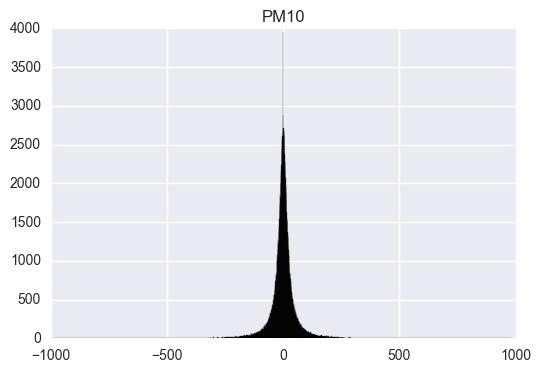

In [15]:
df_Sorted.diff().hist(color='k', alpha=0.7, bins=3000)
#Histogram plot

<b> Sort Values According to Occurence </b>

In [95]:
df_Sorted.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PM10
count,370787.000000
mean,75.526098
std,86.283927
min,0.000000
25%,NaN
50%,NaN
75%,NaN
max,1093.080000


In [19]:
df_Sorted['PM10'].value_counts().max() # maximum count

125

In [20]:
df_Sorted['PM10'].value_counts().idxmax() # value with max count

1.3200000000000001

In [21]:
df_Sorted['PM10'] = np.log(df_Sorted['PM10'])

<b> Autcorrelation plot for After log conversion </b>

In [23]:
df_Sorted['PM10'].value_counts().max() # maximum count

125

In [24]:
df_Sorted['PM10'].value_counts().idxmax() # value with max count

0.27763173659827955

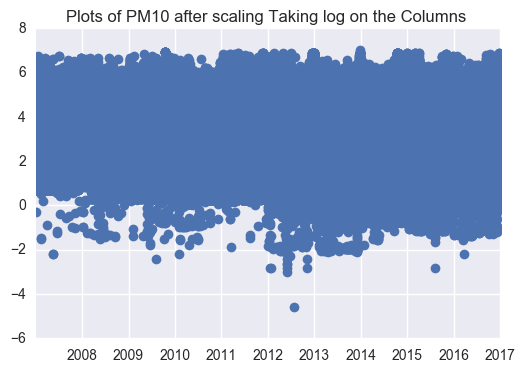

In [30]:
plt.plot_date(x=df_Sorted.date, y=df_Sorted.PM10.values)
plt.title("Plots of PM10 after scaling Taking log on the Columns ")
plt.show()


In [26]:
df_t=pd.DataFrame({ 'x':range(30) })

In [35]:
df_t[0:9].mean()

x    4.0
dtype: float64

In [37]:
df_indexed_with_date =df_Sorted.set_index('date')

In [43]:
df_indexed_with_date[0:0]

,PM10
date,


In [44]:
del df_indexed_with_date.index.name # delete index name


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1251c1f28>], dtype=object)

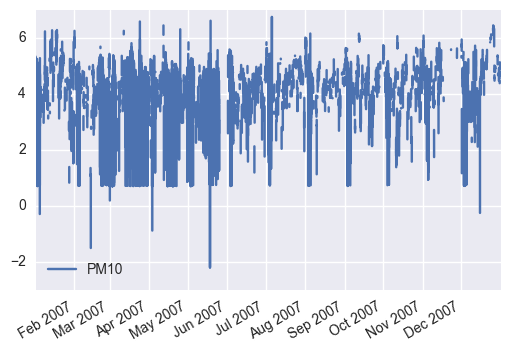

In [49]:
df_indexed_with_date['2007':'2007'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115da31d0>], dtype=object)

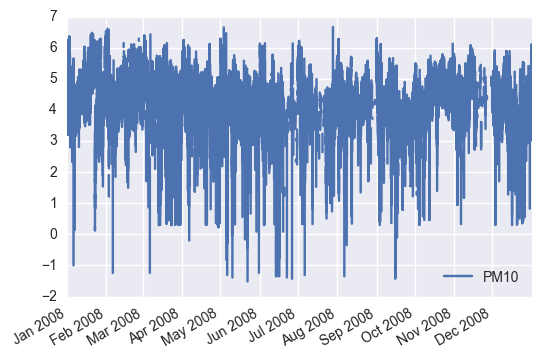

In [51]:
df_indexed_with_date['2008':'2008'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1251c7978>], dtype=object)

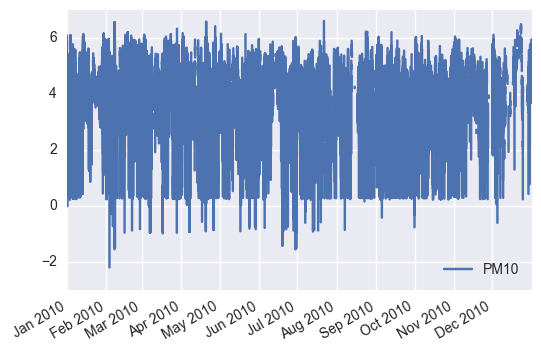

In [52]:
df_indexed_with_date['2010':'2010'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x136e1c358>], dtype=object)

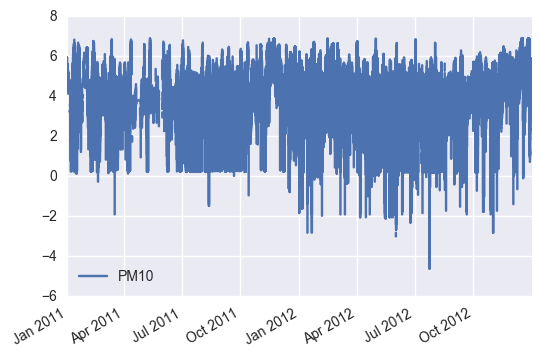

In [111]:
df_indexed_with_date['2011':'2012'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x163e8aa58>], dtype=object)

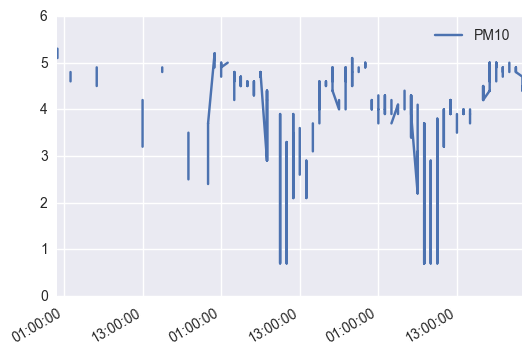

In [253]:
df_indexed_with_date['2007-01-02 00:00:00':'2007-01-04 23:00:00'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x163fd8828>], dtype=object)

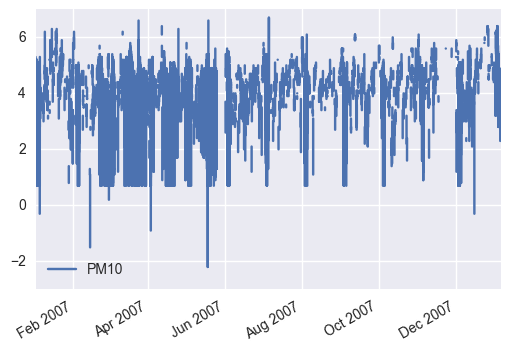

In [255]:
df_indexed_with_date['2007-01-02 00:00:00':'2008-01-05 15:00:00'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x18ff2c860>], dtype=object)

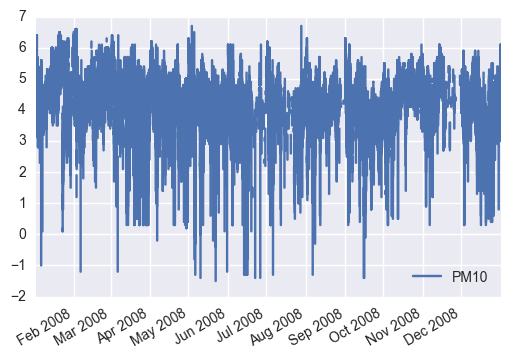

In [406]:
df_indexed_with_date['2008-01-02 00:00:00':'2008-12-31 23:00:00'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1900023c8>], dtype=object)

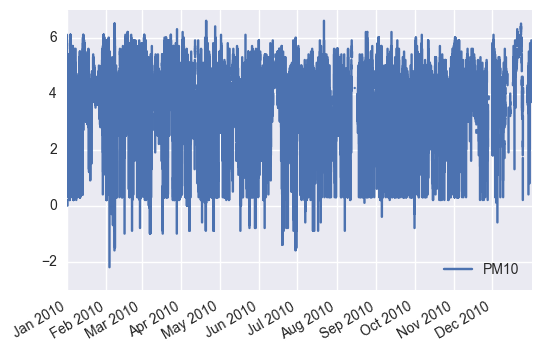

In [408]:
df_indexed_with_date['2010-01-01 00:00:00':'2010-12-31 23:00:00'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x18fe4ca90>], dtype=object)

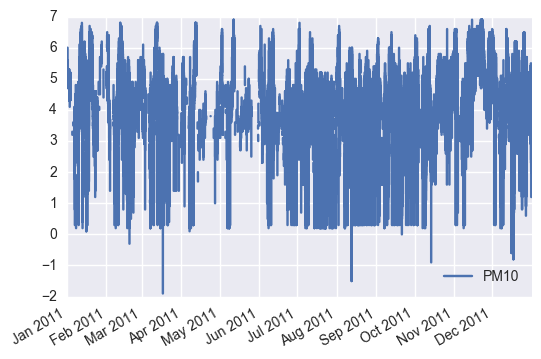

In [413]:
df_indexed_with_date['2011-01-01 00:00:00':'2011-12-31 23:00:00'].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x195387eb8>], dtype=object)

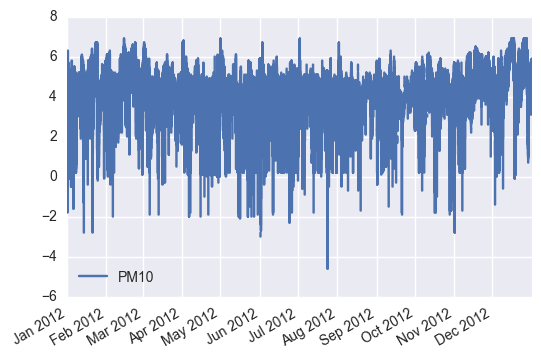

In [415]:
df_indexed_with_date['2012-01-01 00:00:00':'2012-12-31 23:00:00'].plot(subplots=True)

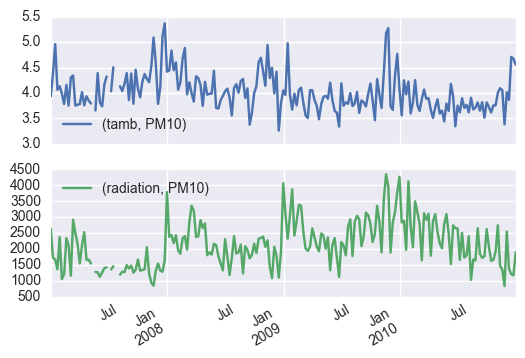

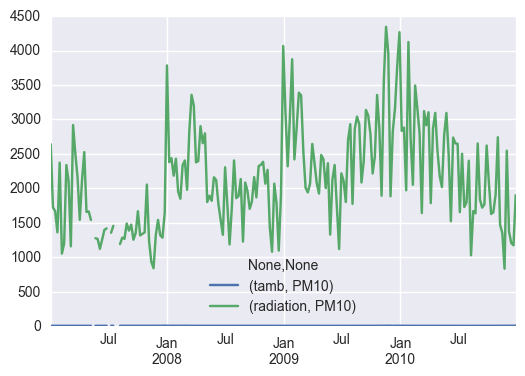

In [260]:
AO_mm=df_indexed_with_date.resample('7D').agg({'radiation': np.sum, 'tamb': np.mean})
AO_mm['2007':'2010'].plot(subplots=True)
AO_mm['2007':'2010'].plot()


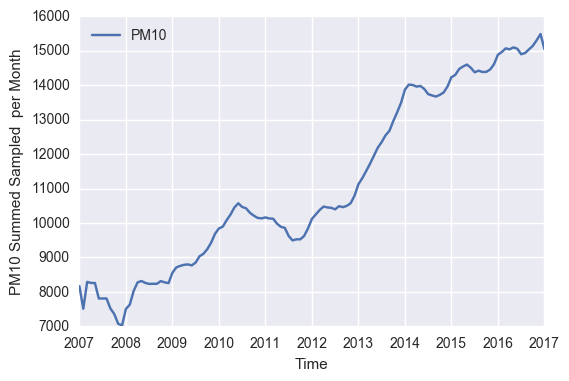

In [99]:
df_indexed_with_date.resample("1M").sum().rolling(window=30, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per Month')

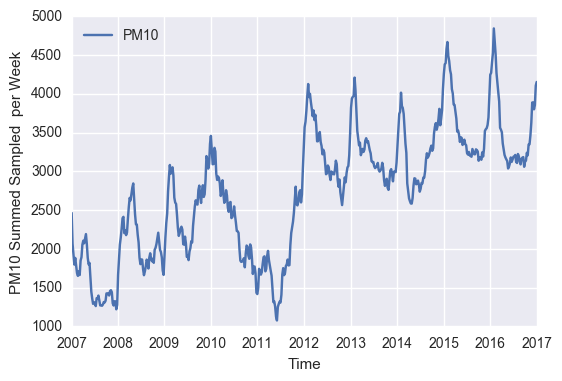

In [100]:
df_indexed_with_date.resample("1W").sum().rolling(window=7, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per Week')

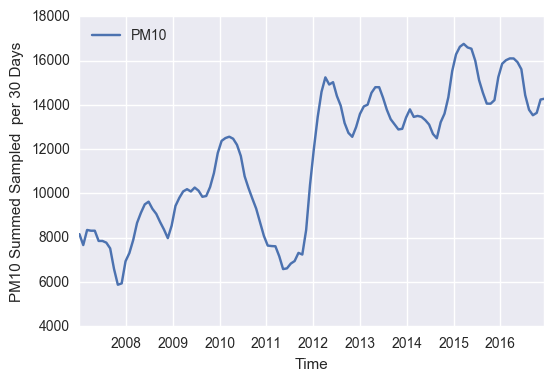

In [105]:
df_indexed_with_date.resample("30D").sum().rolling(window=7, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per 30 Days')

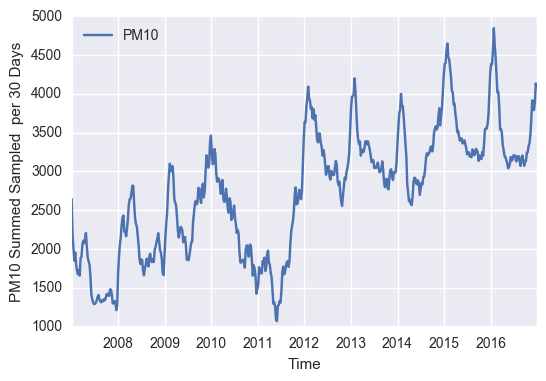

In [106]:
df_indexed_with_date.resample("7D").sum().rolling(window=7, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per 7 Days')

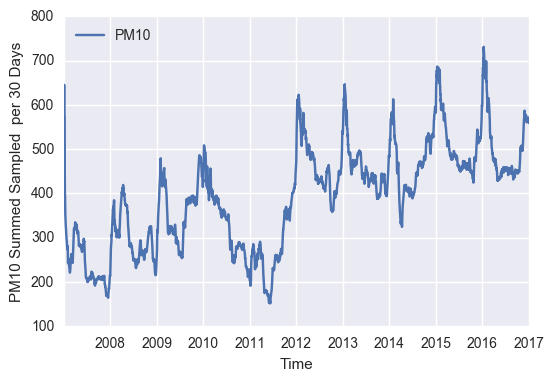

In [107]:
df_indexed_with_date.resample("1D").sum().rolling(window=30, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per 30 Days')

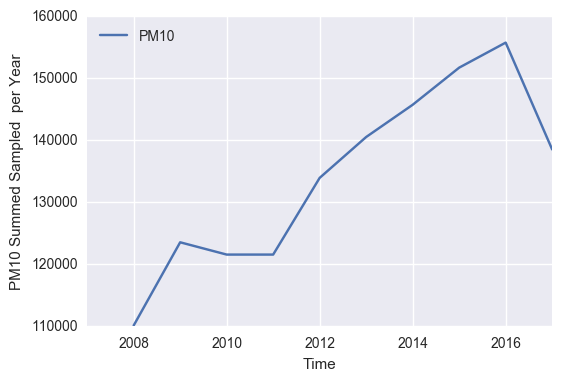

In [261]:
df_indexed_with_date.resample("1A").sum().rolling(window=30, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('PM10 Summed Sampled  per Year')